In [1]:
# import json
# import pandas as pd
# with open('all000a.json') as f:
#    data = json.load(f)

#print(data)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_json('all000a.json')

In [4]:
#renaming the column to make it accessible
df.columns = ['Item2472']

In [5]:
#df_complete = df[df['Item2472'].map(len) == 3]

In [6]:
#df_incomplete = df[df['Item2472'].map(len) == 2]

In [7]:
df = pd.concat([df,df['Item2472'].apply(pd.Series)],axis=1)

In [8]:
df.columns = ['Item2472','Date','Price', 'AmountSold']

In [9]:
df

,Item2472,Date,Price,AmountSold
0,"[1425600000000, 1863]",1.425600e+12,1863.0,NaN
1,"[1425686400000, 1863]",1.425686e+12,1863.0,NaN
2,"[1425772800000, 1863]",1.425773e+12,1863.0,NaN
3,"[1425859200000, 1773]",1.425859e+12,1773.0,NaN
4,"[1425945600000, 1773]",1.425946e+12,1773.0,NaN
...,...,...,...,...
2670,"[1664323200000, 85, 136]",1.664323e+12,85.0,136.0
2671,"[1664409600000, 85, 801]",1.664410e+12,85.0,801.0
2672,"[1664496000000, 85, 279]",1.664496e+12,85.0,279.0
2673,"[1664582400000, 85, 650]",1.664582e+12,85.0,650.0


In [10]:
#Change timestamp into real date
from datetime import datetime
df['Date'] = pd.to_datetime(df['Date'], unit = 'ms')

In [11]:
df

,Item2472,Date,Price,AmountSold
0,"[1425600000000, 1863]",2015-03-06,1863.0,NaN
1,"[1425686400000, 1863]",2015-03-07,1863.0,NaN
2,"[1425772800000, 1863]",2015-03-08,1863.0,NaN
3,"[1425859200000, 1773]",2015-03-09,1773.0,NaN
4,"[1425945600000, 1773]",2015-03-10,1773.0,NaN
...,...,...,...,...
2670,"[1664323200000, 85, 136]",2022-09-28,85.0,136.0
2671,"[1664409600000, 85, 801]",2022-09-29,85.0,801.0
2672,"[1664496000000, 85, 279]",2022-09-30,85.0,279.0
2673,"[1664582400000, 85, 650]",2022-10-01,85.0,650.0


In [12]:
# df_null = df[df['Amount Sold'].isna()]

In [13]:
#https://stackoverflow.com/questions/64745344/reverse-rows-in-time-series-dataframe
df_reverse = df.iloc[::-1]

In [14]:
#Pick date from 2019-Present
df_reverse = df_reverse[(df_reverse['Date'] >='2019-01-01')]

In [15]:
df_reverse

,Item2472,Date,Price,AmountSold
2674,"[1664668800000, 85]",2022-10-02,85.0,NaN
2673,"[1664582400000, 85, 650]",2022-10-01,85.0,650.0
2672,"[1664496000000, 85, 279]",2022-09-30,85.0,279.0
2671,"[1664409600000, 85, 801]",2022-09-29,85.0,801.0
2670,"[1664323200000, 85, 136]",2022-09-28,85.0,136.0
...,...,...,...,...
1310,"[1546646400000, 19, 2108]",2019-01-05,19.0,2108.0
1309,"[1546560000000, 19, 1768]",2019-01-04,19.0,1768.0
1308,"[1546473600000, 19, 2228]",2019-01-03,19.0,2228.0
1307,"[1546387200000, 19, 1809]",2019-01-02,19.0,1809.0


In [16]:
df_reverse['Date'] = pd.to_datetime(df_reverse['Date'])

In [17]:
#df_threecolumns_reverse.set_index('Date')

In [18]:
tdi = pd.DatetimeIndex(df_reverse.Date)
df_reverse.set_index(tdi, inplace=True)
df_reverse.drop(columns='Date', inplace=True)
df_reverse.index.name = 'Date'
df_reverse

,Item2472,Price,AmountSold
Date,,,
2022-10-02,"[1664668800000, 85]",85.0,NaN
2022-10-01,"[1664582400000, 85, 650]",85.0,650.0
2022-09-30,"[1664496000000, 85, 279]",85.0,279.0
2022-09-29,"[1664409600000, 85, 801]",85.0,801.0
2022-09-28,"[1664323200000, 85, 136]",85.0,136.0
...,...,...,...
2019-01-05,"[1546646400000, 19, 2108]",19.0,2108.0
2019-01-04,"[1546560000000, 19, 1768]",19.0,1768.0
2019-01-03,"[1546473600000, 19, 2228]",19.0,2228.0


In [19]:
 df_reverse = df_reverse.drop(['Item2472', 'Price'], axis=1)

In [20]:
df_reverse

,AmountSold
Date,
2022-10-02,NaN
2022-10-01,650.0
2022-09-30,279.0
2022-09-29,801.0
2022-09-28,136.0
...,...
2019-01-05,2108.0
2019-01-04,1768.0
2019-01-03,2228.0


In [21]:
#df_threecolumns_reverse = df_threecolumns_reverse.set_index('Date')

<AxesSubplot:xlabel='Date'>

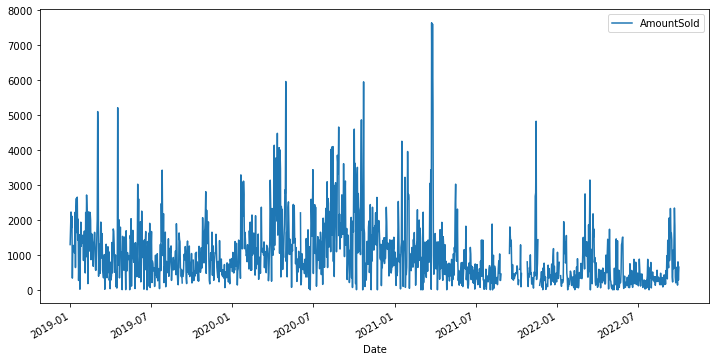

In [22]:
df_reverse.plot(figsize=(12,6))

In [60]:
# from statsmodels.tsa.seasonal import seasonal_decompose

In [61]:
# results = seasonal_decompose(df_reverse['AmountSold'])
# results.plot();

In [23]:
len(df_reverse)

1369

In [24]:
df_reverse.head(30)

,AmountSold
Date,
2022-10-02,NaN
2022-10-01,650.0
2022-09-30,279.0
2022-09-29,801.0
2022-09-28,136.0
2022-09-27,325.0
2022-09-26,645.0
2022-09-25,468.0
2022-09-24,201.0


In [25]:
df_reverse

,AmountSold
Date,
2022-10-02,NaN
2022-10-01,650.0
2022-09-30,279.0
2022-09-29,801.0
2022-09-28,136.0
...,...
2019-01-05,2108.0
2019-01-04,1768.0
2019-01-03,2228.0


In [26]:
#drop null values
#df_reverse= df_reverse.dropna()
#Filling empty rows
#interpolate median
#df_reverse = df_reverse.assign(FillMean=df_reverse.AmountSold.fillna(df_reverse.AmountSold.mean()))
df_reverse_try = df_reverse.assign(FillMean=df_reverse.AmountSold.fillna(df_reverse.AmountSold.median()))

In [27]:
df_reverse_try.drop(columns='AmountSold', inplace=True)

In [28]:
df_reverse_try

,FillMean
Date,
2022-10-02,768.0
2022-10-01,650.0
2022-09-30,279.0
2022-09-29,801.0
2022-09-28,136.0
...,...
2019-01-05,2108.0
2019-01-04,1768.0
2019-01-03,2228.0


In [29]:
df_reverse_try.columns = ['AmountSold']

In [30]:
df_reverse_try

,AmountSold
Date,
2022-10-02,768.0
2022-10-01,650.0
2022-09-30,279.0
2022-09-29,801.0
2022-09-28,136.0
...,...
2019-01-05,2108.0
2019-01-04,1768.0
2019-01-03,2228.0


<AxesSubplot:xlabel='Date'>

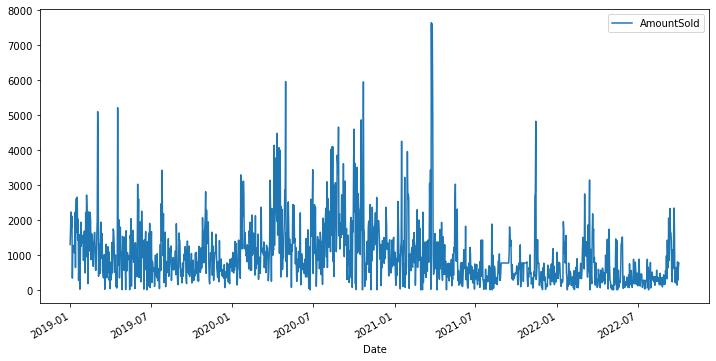

In [31]:
#Trial begins
df_reverse_try.plot(figsize=(12,6))

In [32]:
#changing dataframe to a numpy array
df_reverse_try = df_reverse_try.values

In [33]:
#check
df_reverse_try

array([[ 768.],
       [ 650.],
       [ 279.],
       ...,
       [2228.],
       [1809.],
       [1295.]])

In [34]:
#We are using 95% training data
#ceil rounds up the number
training_data_len = int(np.ceil(len(df_reverse_try)*0.95))

In [35]:
training_data_len


1301

In [36]:
#scaling the data
from sklearn.preprocessing import MinMaxScaler
#values between 0 and 1
scaler = MinMaxScaler(feature_range=(0,1))
#transform dataframe 
scaled_data = scaler.fit_transform(df_reverse_try)
scaled_data

array([[0.1005104 ],
       [0.0850674 ],
       [0.03651355],
       ...,
       [0.29158487],
       [0.23674912],
       [0.16948043]])

In [37]:
#Create scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
#splitting the data into x_train and y_train

x_train = []
#target variable
y_train = []

#append past 60 values to x_train data.
#i not included
for i in range(60, len(train_data)):
    #60 values(0-59)
    x_train.append(train_data[i-60:i,0])
    #(60-len(train_data))
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()

#Converting x_train and y_train to numpy arrays        
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshaping (LSTM = 3D but this data is 2D(R,C), changing into 3D)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1], 1))

[array([0.1005104 , 0.0850674 , 0.03651355, 0.10482921, 0.01779872,
       0.0425337 , 0.08441303, 0.06124853, 0.02630546, 0.04724512,
       0.24028269, 0.30637351, 0.17144353, 0.07917812, 0.14893339,
       0.02944641, 0.04855385, 0.18714828, 0.21384636, 0.21685643,
       0.30467216, 0.15861798, 0.10954064, 0.26907473, 0.08284256,
       0.10142651, 0.18583955, 0.0410941 , 0.12747023, 0.04606727,
       0.07211098, 0.02120141, 0.05104044, 0.01989268, 0.05614448,
       0.02408062, 0.04685251, 0.01086245, 0.03468132, 0.03023165,
       0.04606727, 0.01871483, 0.06229551, 0.03363434, 0.01950007,
       0.03402696, 0.04515116, 0.03258736, 0.04868473, 0.0314095 ,
       0.07355058, 0.03154037, 0.04920822, 0.03520482, 0.01714435,
       0.04933909, 0.02970815, 0.04096322, 0.05012433, 0.03651355])]
[0.06687606334249444]

[array([0.1005104 , 0.0850674 , 0.03651355, 0.10482921, 0.01779872,
       0.0425337 , 0.08441303, 0.06124853, 0.02630546, 0.04724512,
       0.24028269, 0.30637351, 0.17

In [38]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [40]:
#define LSTM model
model = Sequential()
#100 neurons
#return_sequences is true if using another layer
model.add(LSTM(128,return_sequences = True, input_shape= (x_train.shape[1],1)))
model.add(LSTM(64, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [55]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 128)           66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________


In [42]:
#Training the model
model.fit(x_train, y_train, batch_size=1, epochs=30)

Epoch 1/30
1241/1241 [==============================] - 22s 18ms/step - loss: 0.0108
Epoch 2/30
1241/1241 [==============================] - 20s 16ms/step - loss: 0.0106
Epoch 3/30
1241/1241 [==============================] - 20s 16ms/step - loss: 0.0106
Epoch 4/30
1241/1241 [==============================] - 19s 15ms/step - loss: 0.0104
Epoch 5/30
1241/1241 [==============================] - 21s 17ms/step - loss: 0.0103
Epoch 6/30
1241/1241 [==============================] - 23s 19ms/step - loss: 0.0101
Epoch 7/30
1241/1241 [==============================] - 20s 16ms/step - loss: 0.0102
Epoch 8/30
1241/1241 [==============================] - 19s 16ms/step - loss: 0.0100
Epoch 9/30
1241/1241 [==============================] - 19s 15ms/step - loss: 0.0104
Epoch 10/30
1241/1241 [==============================] - 19s 15ms/step - loss: 0.0098
Epoch 11/30
1241/1241 [==============================] - 20s 16ms/step - loss: 0.0097
Epoch 12/30
1241/1241 [==============================] - 21s 17

In [62]:
model.save('lstm_model.h5')

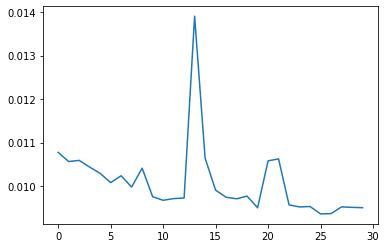

In [43]:
#loss function
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [45]:
#testing dataset
#Scaled test dataset
#(60-end)
test_data = scaled_data[training_data_len -60: , :]
x_test = []
#not used in train
#predict value
y_test = df_reverse_try[training_data_len:, :]
#(60-end)
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])

#Converting to numpy array 
x_test = np.array(x_test)

#Reshaping the data(x_test(No.ofsamples,timesteps, no.offeatures))
#2D-3D #60
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

#models predicted actual sold
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

3/3 [==============================] - 1s 10ms/step


In [56]:
predictions

array([[1004.90814],
       [1194.887  ],
       [1087.8914 ],
       [ 814.24005],
       [ 722.393  ],
       [ 812.2665 ],
       [ 648.5594 ],
       [2207.0776 ],
       [3778.8132 ],
       [3104.0688 ],
       [1246.015  ],
       [1350.7941 ],
       [1214.7395 ],
       [ 980.0834 ],
       [ 890.996  ],
       [1044.6227 ],
       [1069.9647 ],
       [1062.5487 ],
       [ 880.1102 ],
       [ 864.1834 ],
       [1030.5819 ],
       [1106.0155 ],
       [1158.168  ],
       [ 986.90393],
       [1152.7076 ],
       [1456.934  ],
       [1254.4556 ],
       [1079.0483 ],
       [1299.0273 ],
       [1544.1111 ],
       [1169.0138 ],
       [1037.0905 ],
       [1397.4547 ],
       [1820.5814 ],
       [1482.7505 ],
       [1360.2876 ],
       [1160.3601 ],
       [1035.0541 ],
       [1170.2169 ],
       [1232.6124 ],
       [1063.3035 ],
       [1043.5912 ],
       [1134.9949 ],
       [1126.8969 ],
       [1154.7314 ],
       [1097.7029 ],
       [1240.186  ],
       [1125.

In [59]:
valid = df_reverse[training_data_len:]
valid['Predictions'] = predictions
valid

,AmountSold,Predictions
Date,,
2019-03-11,1939.0,1004.908142
2019-03-10,1392.0,1194.886963
2019-03-09,468.0,1087.891357
2019-03-08,918.0,814.240051
2019-03-07,1309.0,722.393005
...,...,...
2019-01-05,2108.0,856.771545
2019-01-04,1768.0,1116.970459
2019-01-03,2228.0,1343.252930


In [46]:
rmse = np.sqrt(np.mean(((predictions-y_test)**2)))
rmse

928.2483236881727

In [47]:
mape = np.mean(np.abs((y_test-predictions)/y_test))* 100

In [48]:
mape

151.21688481909206

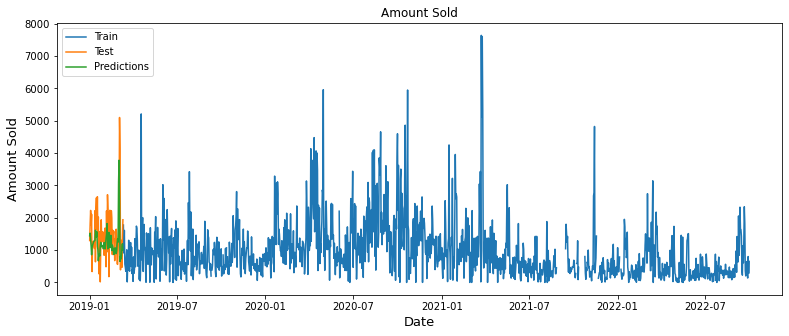

In [54]:
pd.options.mode.chained_assignment = None
train = df_reverse[:training_data_len]
valid = df_reverse[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(13,5))
plt.title('Amount Sold Prediction')
plt.xlabel('Date', fontsize = 13)
plt.ylabel('Amount Sold', fontsize=13)
plt.plot(train['AmountSold'])
plt.plot(valid[['AmountSold', 'Predictions']])
plt.legend(['Train', 'Test', 'Predictions'], loc='upper left')